In [6]:
import pandas as pd
import scipy as sc
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn import metrics,preprocessing
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold


In [7]:
df15 = pd.read_excel("socioeconomic/2015.xls")
df15['CITY'] = df15['CITY'].str.strip()

df13 = pd.read_excel("socioeconomic/2013.xls")
df13['CITY'] = df13['CITY'].str.strip()

df08 = pd.read_excel("socioeconomic/2008.xls")
df08['CITY'] = df08['CITY'].str.strip()

df06 = pd.read_excel("socioeconomic/2006.xls")
df06['CITY'] = df06['CITY'].str.strip()

df01 = pd.read_excel("socioeconomic/2001.xls")
df01['CITY'] = df01['CITY'].str.strip()

df99 = pd.read_excel("socioeconomic/1999.xls")
df99['CITY'] = df99['CITY'].str.strip()





In [8]:
#Cleaning the data
df15 = df15.replace('..', 0).replace(',','').set_index('CITY')
df15 = df15.dropna(thresh=5) 
df15 = df15.round()
del df15['SYMBOL']

df13 = df13.replace('..', 0).replace(',','').set_index('CITY')
df13 = df13.dropna(thresh=5) 
df13 = df13.round(0)
del df13['SYMBOL']

df08 = df08.replace('..', 0).replace(',','').set_index('CITY')
df08 = df08.dropna(thresh=5) 
df08 = df08.round(0)
del df08['SYMBOL']

df06 = df06.replace('..', 0).replace(',','').set_index('CITY')
df06 = df06.dropna(thresh=5) 
df06 = df06.round(0)
del df06['SYMBOL']

df01 = df01.replace('..', 0).replace(',','').set_index('CITY')
df01 = df01.dropna(thresh=5) 
df01 = df01.round(0)

df99 = df99.replace('..', np.nan).set_index('CITY')
df99 = df99.dropna(thresh=2) 
df99 = df99.round()



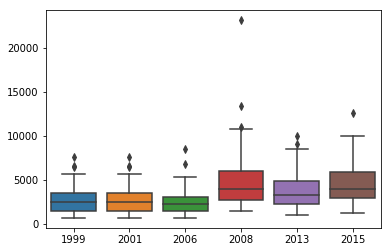

In [9]:
result = pd.concat([df99['AVERAGE INCOME'], df01['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df06['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df08['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df13['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df15['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result.columns = ['1999','2001','2006','2008','2013','2015']

sns.boxplot(data=result);

As it is possible to see above, the gaps between rich and poor are bigger during the last 10 years then before.
is it a symbol for the political map?

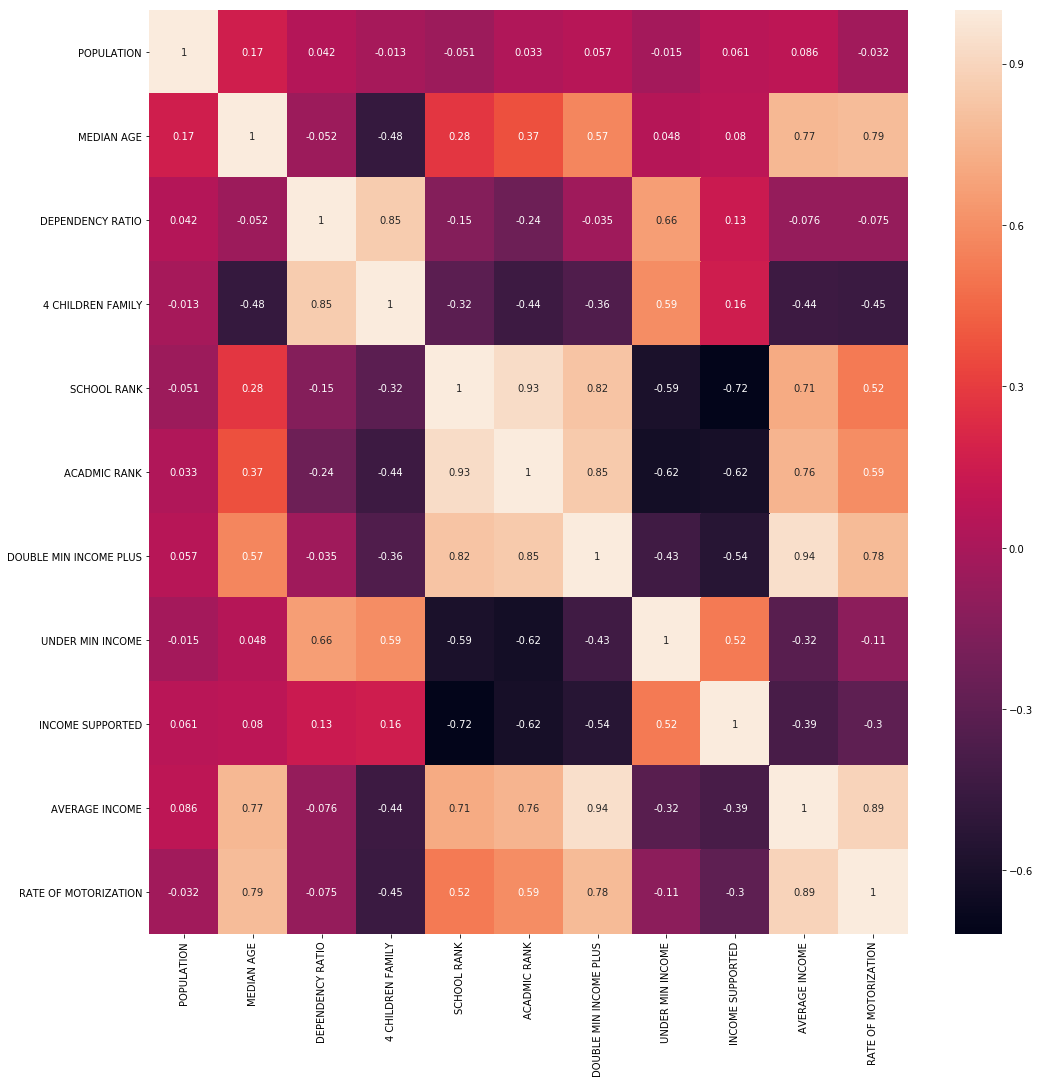

In [11]:
plt.figure(figsize = (17,17))
sb.heatmap(df15.corr(), annot=True);

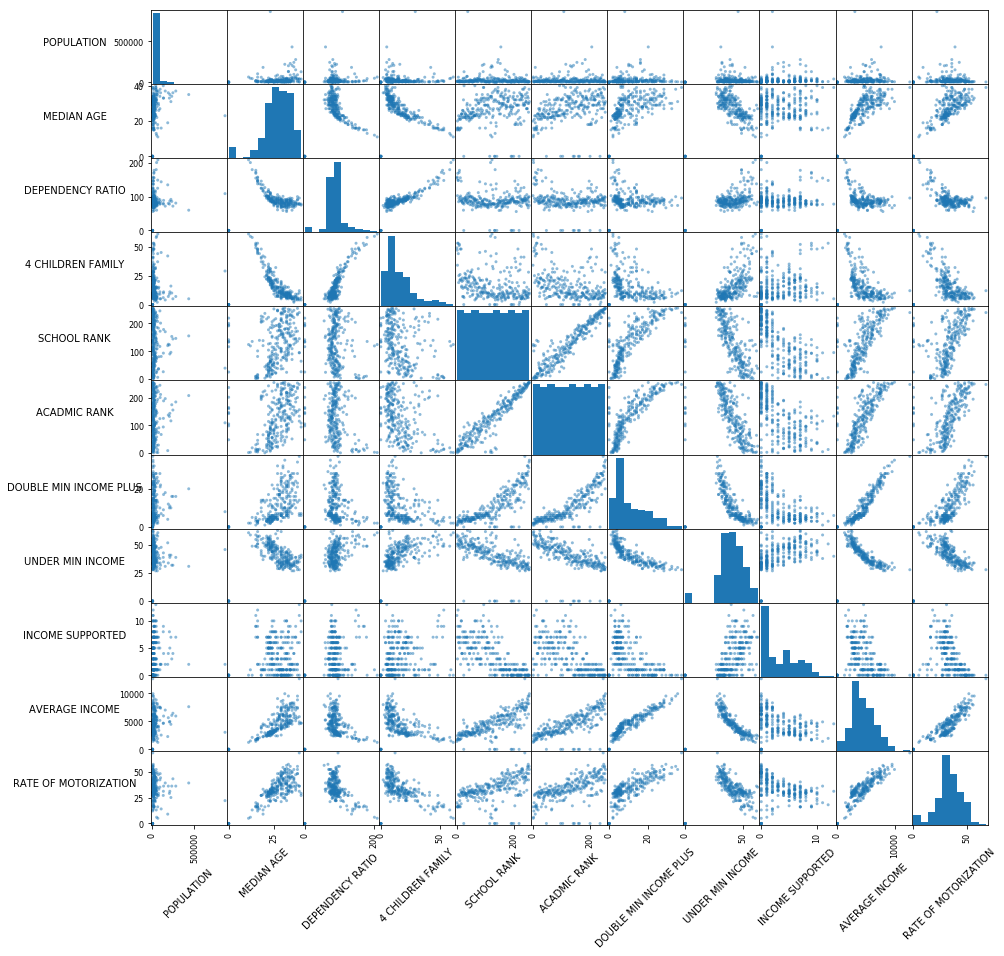

In [20]:
sm = pd.plotting.scatter_matrix(df15,figsize=(15,15));
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
plt.show()


In [22]:
#Get all the election data and set it as label for the current data
kn15 = pd.read_csv("KE/knesset20elections.csv", index_col=0, encoding="utf-8")
kn15.columns = kn15.columns.str.replace(' ', '')
df15_labeled = pd.merge(df15, kn15[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn13 = pd.read_csv("KE/knesset19elections.csv", index_col=0, encoding="utf-8")
kn13.columns = kn13.columns.str.replace(' ', '')
df13_labeled = pd.merge(df13, kn13[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn08 = pd.read_csv("KE/knesset18elections.csv", index_col=0, encoding="utf-8")
kn08.columns = kn08.columns.str.replace(' ', '')
df08_labeled = pd.merge(df08, kn08[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn06 = pd.read_csv("KE/knesset17elections.csv", index_col=0, encoding="utf-8")
kn06.columns = kn06.columns.str.replace(' ', '')
df06_labeled = pd.merge(df06, kn06[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn01 = pd.read_csv("KE/knesset16elections.csv", index_col=0, encoding="utf-8")
kn01.columns = kn01.columns.str.replace(' ', '')
df01_labeled = pd.merge(df01, kn01[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn99 = pd.read_csv("KE/knesset15elections.csv", index_col=0, encoding="utf-8")
kn99.columns = kn99.columns.str.replace(' ', '')
df99_labeled = pd.merge(df99, kn99[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

In [44]:
train_df = pd.DataFrame()
train_df = train_df.append(df13_labeled)
train_df = train_df.append(df08_labeled)
train_df = train_df.append(df06_labeled)
train_df = train_df.append(df01_labeled)
train_df = train_df.append(df99_labeled)
X = train_df[['MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS']]
y = train_df['Center']*100.0/(train_df['Right']+train_df['Left']+train_df['Center']+train_df['Arabs']+train_df['Orthodox'])
#xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)


Text(0.5,1,'Train data set for Center')

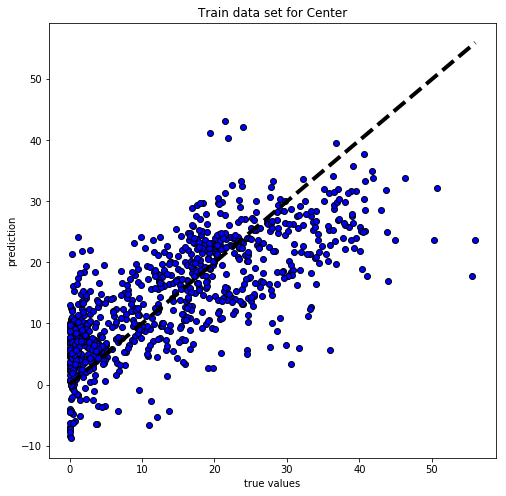

In [45]:
model = linear_model.LinearRegression(n_jobs = 5)
X = train_df[['MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS']]
y = train_df['Center']*100.0/(train_df['Right']+train_df['Left']+train_df['Center']+train_df['Arabs']+train_df['Orthodox'])
y_pred = cross_val_predict(model,X,y,cv = 10)
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y, y_pred,edgecolors=(0,0,0),c='b')
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('true values')
ax.set_ylabel('prediction')
plt.title('Train data set for Center')


Text(0.5,1,'Predition data 2015 set for Center')

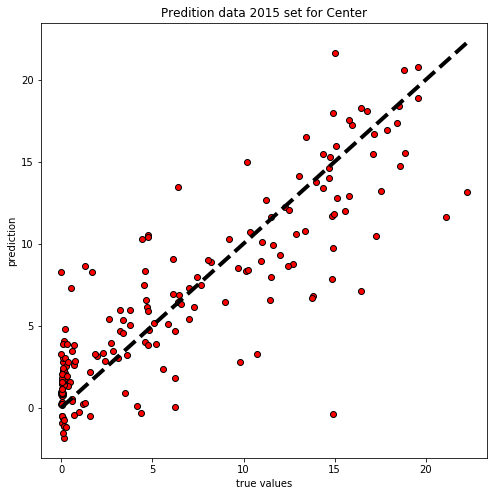

In [46]:
X = df15_labeled[['MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS']]
y = df15_labeled['Center']*100.0/(df15_labeled['Right']+df15_labeled['Left']+df15_labeled['Center']+df15_labeled['Arabs']+df15_labeled['Orthodox'])
y_pred = cross_val_predict(model,X,y,cv = 10)
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y, y_pred,edgecolors=(0,0,0),c='r')
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('true values')
ax.set_ylabel('prediction')
plt.title('Predition data 2015 set for Center')


Text(0.5,1,'Train data set for Right')

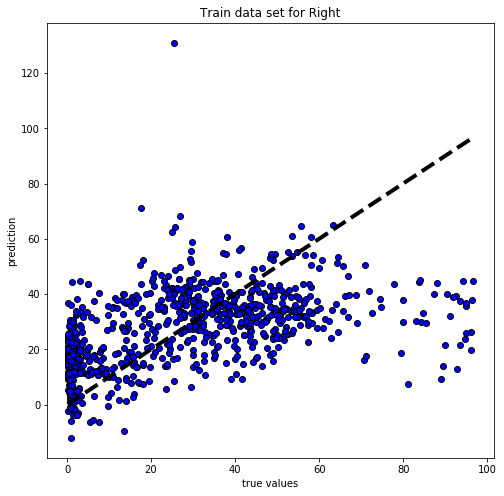

In [47]:
model = linear_model.LinearRegression(n_jobs = 5)
X = train_df[['MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS']]
y = train_df['Right']*100.0/(train_df['Right']+train_df['Left']+train_df['Center']+train_df['Arabs']+train_df['Orthodox'])
y_pred = cross_val_predict(model,X,y,cv = 10)
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y, y_pred,edgecolors=(0,0,0),c='b')
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('true values')
ax.set_ylabel('prediction')
plt.title('Train data set for Right')


Text(0.5,1,'Predition data 2015 set for Right')

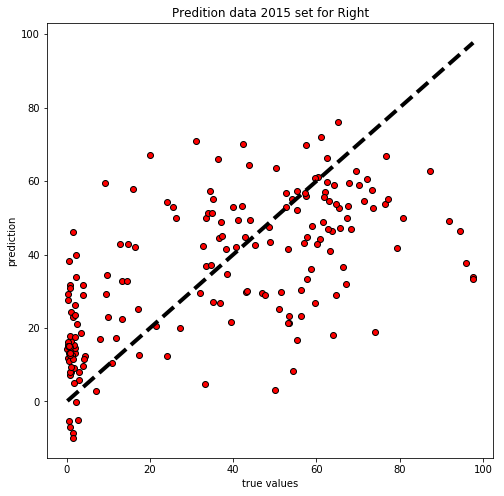

In [48]:
X = df15_labeled[['MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS']]
y = df15_labeled['Right']*100.0/(df15_labeled['Right']+df15_labeled['Left']+df15_labeled['Center']+df15_labeled['Arabs']+df15_labeled['Orthodox'])
y_pred = cross_val_predict(model,X,y,cv = 10)
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y, y_pred,edgecolors=(0,0,0),c='r')
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('true values')
ax.set_ylabel('prediction')
plt.title('Predition data 2015 set for Right')


Text(0.5,1,'Train data set for Left')

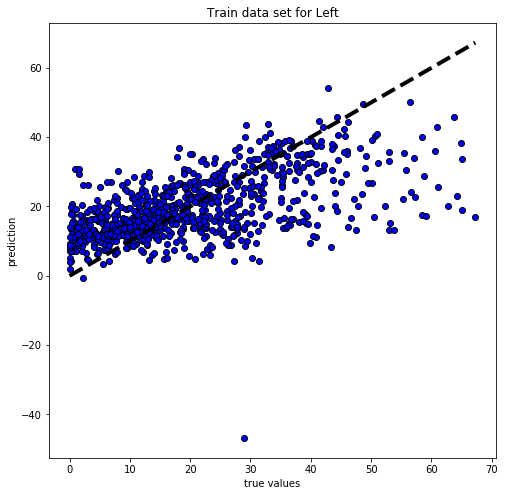

In [49]:
model = linear_model.LinearRegression(n_jobs = 5)
X = train_df[['MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS']]
y = train_df['Left']*100.0/(train_df['Right']+train_df['Left']+train_df['Center']+train_df['Arabs']+train_df['Orthodox'])
y_pred = cross_val_predict(model,X,y,cv = 10)
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y, y_pred,edgecolors=(0,0,0),c='b')
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('true values')
ax.set_ylabel('prediction')
plt.title('Train data set for Left')


Text(0.5,1,'Predition data 2015 set for Left')

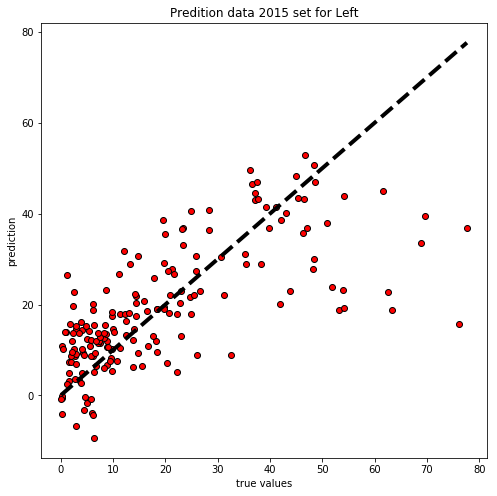

In [50]:
X = df15_labeled[['MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS']]
y = df15_labeled['Left']*100.0/(df15_labeled['Right']+df15_labeled['Left']+df15_labeled['Center']+df15_labeled['Arabs']+df15_labeled['Orthodox'])
y_pred = cross_val_predict(model,X,y,cv = 10)
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y, y_pred,edgecolors=(0,0,0),c='r')
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('true values')
ax.set_ylabel('prediction')
plt.title('Prediction data 2015 set for Left')